# Binary Search

Binary search is a *fundamental* algorithm in Computer Science.

## Finding a value in a sorted sequence

In its simplest form, _binary search_ is used to quickly find a value in a `sorted` sequence. Binary search mantains a contiguous subsequence from the original sequence. This is called the `search space`. 
Intially, the `search space` contains the whole sequence.
At each step, the algorithm will compare the `median` of the search space against the value it is looking for. Based on the comparision, the algorithm can eliminate  half of the search space.
By doing this repeatedly, binary search will eventually end with a single element in the search space.

Consider the following sequence and assume we are looking for the value `55`
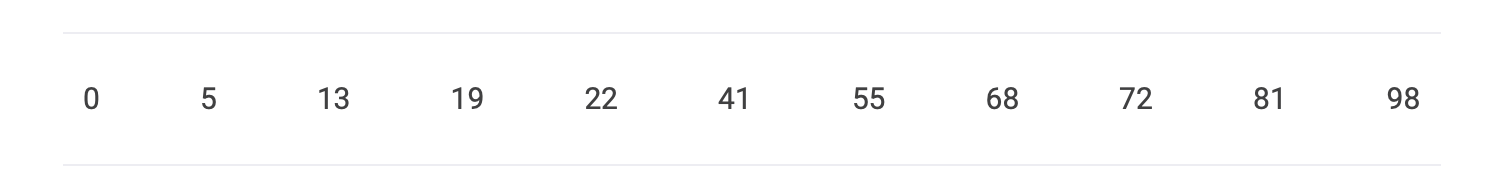

The search space will be represented as an interval, initially covering all the sequence.

We will use the indices of the sequence to represent the invertal [1-11].

We start by probing the median of the subsequence, in this case the index 6. The value at 6 is 22. From this we can conclude the following:
* The index 6 does not contain the value we are looking because it is smaller
* Since the sequence is sorted, everything before the index 6 will be equal or smaller than 22, so we can also prune this from the search space.
* So, the search space can be updated to 7-11

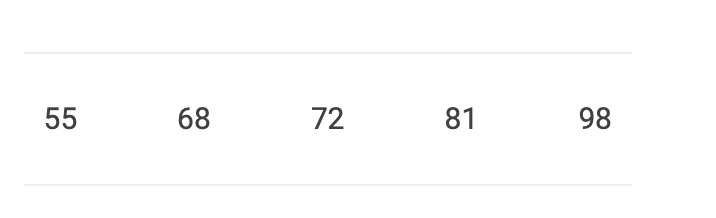

We proceed in a similar fashion (probe 72 and remove the upper part of the current interval)

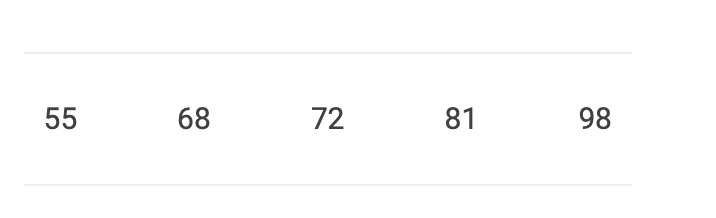

Depening on how we select the median, we could find 55 in this step, or take one more extra step to find the target.

If the target value is not present on the sequence, the search space will be exhausted. 
Pseudo code of the algorithm in its simplest form.

```python
def binary_search(A, target):
    lo = 0, hi = size(A) - 1
    while lo <= hi: ## This guarantess that we have one element in the search space. 
        mid = lo + (hi - lo) / 2 ## Computes the median with a bias to the left in case of even numbers
        if A[mid] == target: return mid
        else if A[mid] < target: lo = mid + 1
        else: hi = mid - 1 
    print("Search space exhausted, target was not found")
```

## Complexity

Since each comparison halves the search space, we can assert that binary search will use at most `O(logn)` comparisons.

Note that we need to have random access to the sequence (doing binary search on a linked list will defeat its purpose since we cannot probe a random element)


## Beyond Arrays: The discrete binary search
There is no reason to restrict ourselves with a tangible sequence, if we have a monotonic function `f` whose domain is the set of integers, we can use that function as the comparison point in the binary search algorithm. The only difference is that instead of performing an array lookup, we would perform a function evaluation on the search space median.

The `search space` now becomes a subinterval of the `domain` of the function while the `target`  is an element of the `codomain`. We still only need to perform `O(logn)` comparisons (or functions evaluations on this case)

## Taking it further: The main theorem.

Consider a predicate `p` defined over some ordered set `S` (the search space). The search space consists of candidate solutions to the problem. We use the predicate to verify if a candidate is legal according to the problem definition.

The main theorem states that binary search can be used if and only if for `all` `x` in `S` `p(x) implies p(y) for all y>x`, It is equivalent to saying that `¬p(x) implies ¬p(y) for all y < x`. This property is what allow us to discard half the search space. 

What the math is saying is that if we have a `yes` or `no` answer (the predicate), getting a `yes` for x will also get a `yes` for all values bigger than x, similarly, getting a `no` for another value `t` will get `no` for all the values less than `t`.

This means that we would have a series of `no` answers followed by a series of `yes` answers. (We could also have the opposite form of `yes` followed by `no`)

If the condition of the main theorem is satifiedd, binary serach can be applied to find the first legal answer.
Applying the binary search algorithm require us to find a `predicate` function that will help us get the conditions stated previously.

We can tweak the algorithm to either find the first `yes` or the last `no`.

Once the predicate is set, now you will need to prove that the conditions required are preserved by the chosen predicate.( `p(x) implies p(y) for all y > x or that ¬p(x) implies ¬p(y) for all y < x`)

These two parts are most often interleaved: when we think a problem can be solved by binary search, we aim to design the predicate so that it satisfies the condition in the main theorem.

Why should we use this abstraction instead of the simpler algorithm? There are problems that cannot be modeled as searching for a particular value, but it’s possible to define and evaluate a predicate such as “Is there an assignment which costs x or less?” when we’re looking for some sort of assignment with the lowest cost. 

## Example of the main theorem.

Lets try to apply the theorem for the task of finding an element on an array.

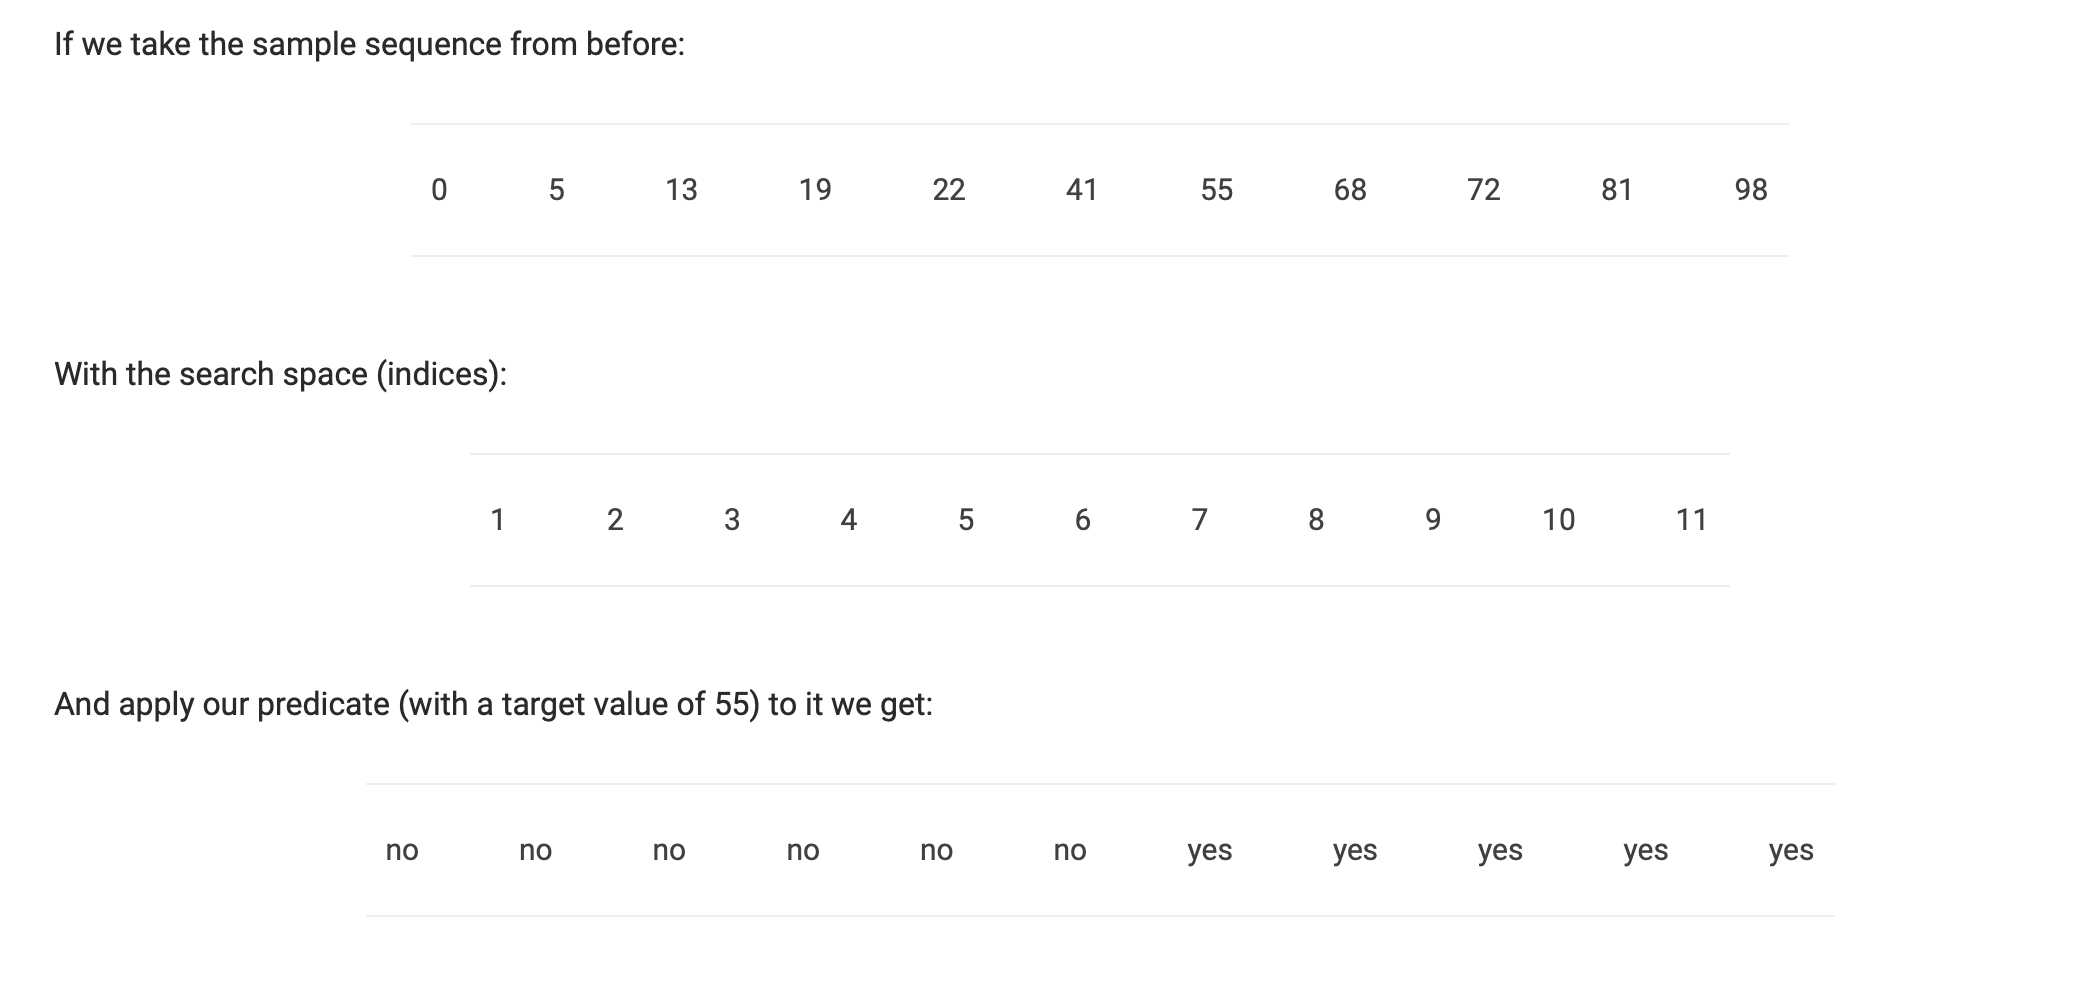

## Implementing the discrete algorithm

When implementing the binary search algorithm, it is important to settle on the interval you want to maintain. All of your code should be directed on maintaining the invariant you select. Make sure your bounds are correct, also you can probably relax your bounds since it will not impact the overall running time.

```python
def binary_search(lo, hi, p):
    while lo < hi:
        mid = lo + (hi - lo) / 2
        if p(mid) == true:
          hi = mid
        else:
          lo = mid + 1
        
    if p(lo) == false:
          print("Nothing in the search space evaluated to true :(") # p(x) is false for all x in S!

    return lo # lo is the least x for which p(x) is true

```

The two crucial lines are `hi = mid and lo = mid+1`. When `p(mid)` is true, we can discard the second half of the search space, since the predicate is true for all elements in it (by the main theorem). However, we can **not** discard mid itself, since it may well be the first element for which p is true. This is why moving the upper bound to mid is as aggressive as we can do without introducing bugs.

In a similar vein, if `p(mid)` is false, we can discard the first half of the search space, but this time including mid. `p(mid)` is false so we don’t need it in our search space. This effectively means we can move the lower bound to `mid+1`.


If we wanted to find the last x for which p(x) is false, we would devise (using a similar rationale as above) something like:

```python
## warning: there is a nasty bug in this snippet!
def binary_search(lo, hi, p):
  while lo < hi:
      mid = lo + (hi - lo) / 2 ## note: division truncates
      if p(mid) == true: hi = mid - 1
      else: lo = mid
  
  if p(lo) == true: complain ## p(x) is true for all x in S!

  return lo ## lo is the greatest x for which p(x) is false
```


You can verify that this satisfies our condition that the element we’re looking for always be present in the interval (lo, hi). However, there is another problem. Consider what happens when you run this code on some search space for which the predicate gives:

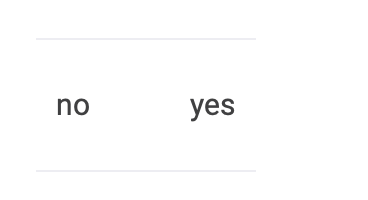


The code will get stuck in a loop. It will always select the first element as mid, but then will not move the lower bound because it wants to keep the no in its search space. The solution is to change `mid = lo + (hi-lo)/2` to `mid = lo + (hi-lo+1)/2`, i.e. so that it rounds up instead of down. There are other ways of getting around the problem, but this one is possibly the cleanest. Just remember to always test your code on a two-element set where the predicate is false for the first element and true for the second.


# Conclusion
If you’ve gotten this far without giving up, you should be ready to solve anything that can be solved with binary search. Try to keep a few things in mind:

* Design a predicate which can be efficiently evaluated and so that binary search can be applied
* Decide on what you’re looking for and code so that the search space always contains that (if it exists)
* If the search space consists only of integers, test your algorithm on a two-element set to be sure it doesn’t lock up
* Verify that the lower and upper bounds are not overly constrained: it’s usually better to relax them as long as it doesn’t break the predicate


### References
https://www.topcoder.com/thrive/articles/Binary%20Search
    